In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm
import tensorflow as tf
from matplotlib.colors import ListedColormap
from adjustText import adjust_text
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
test_file_path = '../../../../mnt/sda/suhohan/emnist/emnist-byclass-test.csv'
tsne_result_path = 'tsne_results.csv'  # t-SNE 결과 저장 경로

# 데이터 로드
test_data = pd.read_csv(test_file_path)

# 데이터 크기 확인
num_test_samples = test_data.shape[0]

# 데이터 준비
x_test = test_data.iloc[:, 1:].to_numpy().reshape((num_test_samples, 28, 28, 1))
y_test = tf.keras.utils.to_categorical(test_data.iloc[:, 0], 62)
sample_images = x_test.reshape((num_test_samples, -1))
sample_labels = test_data.iloc[:, 0]

In [3]:
def label_transform(label):
    if 0 <= label <= 9:
        return str(label)
    elif 10 <= label <= 35:
        return chr(label + ord('a') - 10)
    elif 36 <= label <= 61:
        return chr(label + ord('A') - 36)
    else:
        return str(label)


# 라벨 변환 적용
transformed_labels = sample_labels.apply(label_transform)

In [12]:
if os.path.exists(tsne_result_path):
    images_tsne = pd.read_csv(tsne_result_path).to_numpy()
else:
    # t-SNE 적용
    tsne = TSNE(n_components=2, random_state=42)
    images_tsne = tsne.fit_transform(sample_images)
    # t-SNE 결과 저장
    np.savetxt(tsne_result_path, images_tsne, delimiter=',')

In [4]:
np.random.seed(42)
random_colors = np.random.rand(62, 3)  # RGB 색상
cmap = ListedColormap(random_colors)

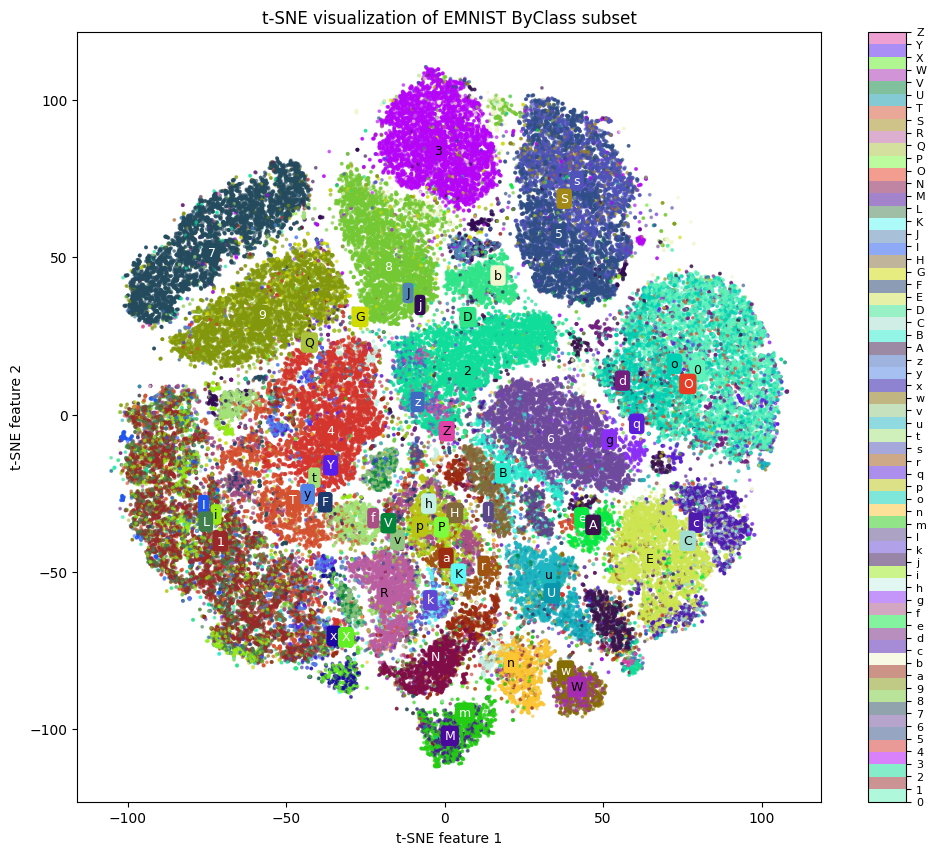

In [23]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=sample_labels, cmap=cmap, s=3, alpha=0.5)
colorbar = plt.colorbar(scatter)

# Colorbar에 라벨 추가
colorbar.set_ticks(np.arange(62))
colorbar.set_ticklabels([label_transform(i) for i in range(62)])
colorbar.ax.tick_params(labelsize=8)

texts = []
for i in range(62):
    mask = sample_labels == i
    mean_x = np.mean(images_tsne[mask, 0])
    mean_y = np.mean(images_tsne[mask, 1])
    label = label_transform(i)
    color = random_colors[i]
    text_color = 'white' if np.mean(color) < 0.5 else 'black'
    texts.append(plt.text(mean_x, mean_y, label, fontsize=9, ha='center', va='center',
                          bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'), color=text_color))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.7))

plt.title('t-SNE visualization of EMNIST ByClass subset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

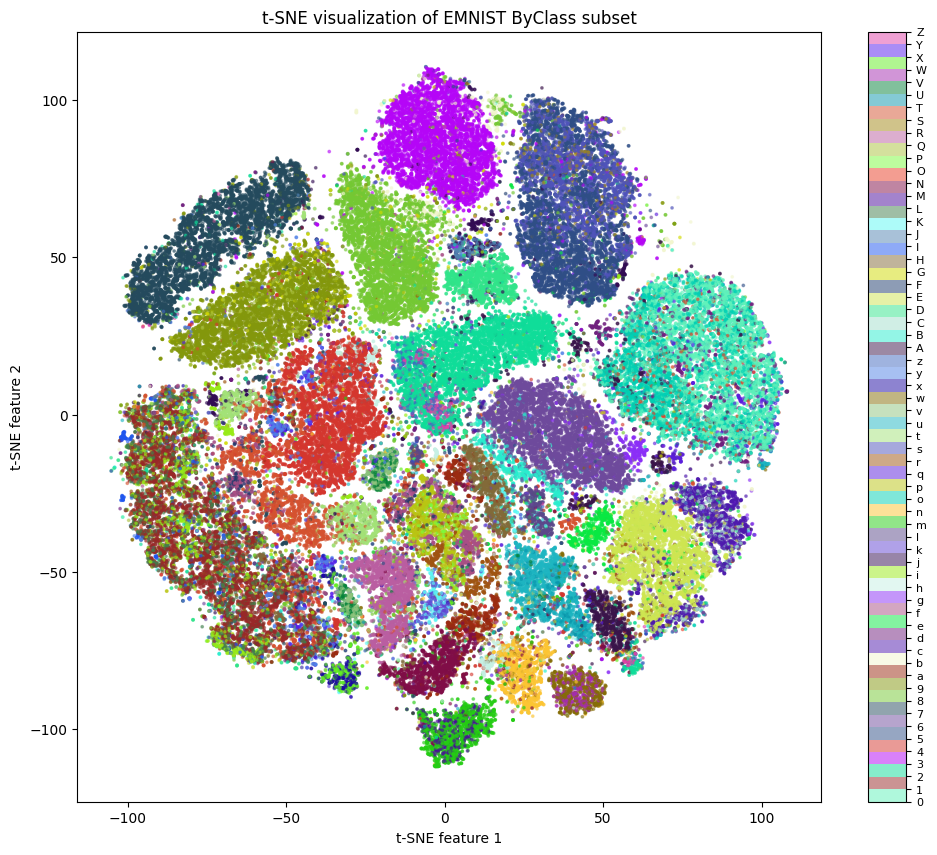

In [18]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=sample_labels, cmap=cmap, s=3, alpha=0.5)
colorbar = plt.colorbar(scatter)

# Colorbar에 라벨 추가
colorbar.set_ticks(np.arange(62))
colorbar.set_ticklabels([label_transform(i) for i in range(62)])
colorbar.ax.tick_params(labelsize=8)

plt.title('t-SNE visualization of EMNIST ByClass subset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [6]:
print(len(x_test))

116322
